## Predicción de precios de portátiles 24-03 FT
https://www.kaggle.com/competitions/prediccion-de-precios-de-portatiles-24-03-ft/data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
data= pd.read_csv("./data/train.csv")
data.isnull().sum()

id                  0
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [67]:
data.shape

(912, 14)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [69]:
data.head(3)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0


In [70]:
data.ScreenResolution.value_counts().head(10)
print(data.ScreenResolution.nunique())
data.ScreenResolution.unique()

37


array(['Full HD / Touchscreen 1920x1080', 'Full HD 1920x1080',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD 2560x1440', 'IPS Panel 2560x1440', '1366x768',
       'IPS Panel Full HD / Touchscreen 1920x1080', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ 2560x1440', '1440x900',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2560x1600', '2560x1440',
       'IPS Panel Retina Display 2304x1440', 'Touchscreen 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       '4K Ultra HD 3840x2160', 'IPS Panel Retina Display 2736x1824',
       'IPS Panel Touchscreen 2560x1440', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Touchscreen 1366x768', 'Touchscreen 2256x1504',
       'Quad HD+ 3200x1800',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160', '1920x1080',
       'IPS Panel Retina Display 2880x1800',
       '

In [71]:
data.ScreenResolution.value_counts().head(10)
print(data.ScreenResolution.nunique())
data.ScreenResolution.unique()

37


array(['Full HD / Touchscreen 1920x1080', 'Full HD 1920x1080',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD 2560x1440', 'IPS Panel 2560x1440', '1366x768',
       'IPS Panel Full HD / Touchscreen 1920x1080', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ 2560x1440', '1440x900',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2560x1600', '2560x1440',
       'IPS Panel Retina Display 2304x1440', 'Touchscreen 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       '4K Ultra HD 3840x2160', 'IPS Panel Retina Display 2736x1824',
       'IPS Panel Touchscreen 2560x1440', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Touchscreen 1366x768', 'Touchscreen 2256x1504',
       'Quad HD+ 3200x1800',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160', '1920x1080',
       'IPS Panel Retina Display 2880x1800',
       '

In [72]:
print(data.OpSys.nunique())
print(data.OpSys.unique())
print(data.OpSys.value_counts())

9
['Chrome OS' 'Windows 10' 'Windows 7' 'Linux' 'No OS' 'macOS' 'Mac OS X'
 'Windows 10 S' 'Android']
OpSys
Windows 10      745
Linux            46
No OS            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64


In [73]:
pd.set_option('display.max_rows', None)
print(data.Cpu.nunique())

102


In [74]:
print(data.Company.nunique())
print(data.Company.unique())

19
['Asus' 'Lenovo' 'Dell' 'Mediacom' 'Toshiba' 'HP' 'Acer' 'Apple' 'MSI'
 'Fujitsu' 'Samsung' 'Chuwi' 'Microsoft' 'Razer' 'Xiaomi' 'Huawei'
 'Google' 'Vero' 'LG']


In [75]:
print(data.OpSys.nunique())
print(data.OpSys.unique())
print(data.OpSys.value_counts())

9
['Chrome OS' 'Windows 10' 'Windows 7' 'Linux' 'No OS' 'macOS' 'Mac OS X'
 'Windows 10 S' 'Android']
OpSys
Windows 10      745
Linux            46
No OS            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64


In [76]:
print(data.Ram.nunique())
print(data.Ram.unique())
print(data.Ram.value_counts())

9
['4GB' '8GB' '16GB' '6GB' '12GB' '2GB' '24GB' '32GB' '64GB']
Ram
8GB     428
4GB     266
16GB    140
6GB      31
12GB     20
2GB      14
32GB     11
24GB      1
64GB      1
Name: count, dtype: int64


In [77]:
# Quitamos las unidades kg en Weithg
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)


In [78]:
# Quitamos las unidades GB en Ram
data['Ram'] = data['Ram'].str.replace('GB', '').astype(float)

In [79]:
data.head(3)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4.0,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8.0,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4.0,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,779.0


In [80]:
# Función para extraer valores de memoria, clasificamos por columnas SSD, HDD, Hybrid, Flash Storage 
# Los valores corresponden a la capacidad en GB
def extract_memory_values(memory_string):
    ssd = hdd = hybrid = flash_storage = 0

    parts = memory_string.split('+')
    for part in parts:
        part = part.strip()
        if 'SSD' in part:
            if 'TB' in part:
                ssd += int(float(part.replace('TB SSD', '').strip()) * 1000)
            else:
                ssd += int(part.replace('GB SSD', '').strip())
        elif 'HDD' in part:
            if 'TB' in part:
                hdd += int(float(part.replace('TB HDD', '').strip()) * 1000)
            else:
                hdd += int(part.replace('GB HDD', '').strip())
        elif 'Hybrid' in part:
            if 'TB' in part:
                hybrid += int(float(part.replace('TB Hybrid', '').strip()) * 1000)
            else:
                hybrid += int(part.replace('GB Hybrid', '').strip())
        elif 'Flash Storage' in part:
            if 'TB' in part:
                flash_storage += int(float(part.replace('TB Flash Storage', '').strip()) * 1000)
            else:
                flash_storage += int(part.replace('GB Flash Storage', '').strip())
    
    return ssd, hdd, hybrid, flash_storage

# Aplicar la función a la columna 'Memory'
data[['SSD', 'HDD', 'Hybrid', 'Flash Storage']] = data['Memory'].apply(lambda x: pd.Series(extract_memory_values(x)))

# Verificar el DataFrame resultante
data.sample(3)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash Storage
165,341,347,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12.0,2TB HDD,AMD Radeon 530,Windows 10,2.20,899.0,0,2000,0,0
45,253,258,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37,1849.0,512,0,0,0
572,1015,1029,Toshiba,Portege A30-C-1CZ,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,1210.0,256,0,0,0


In [81]:
import re
# Función para extraer valores de CPU, clasificamos por tipo de procesador 
def extract_cpu_values(cpu_string):
    intel_core = intel_celeron = intel_atom = intel_pentium = intel_xeon = amd = amd_ryzen = intel_core_m = 0
    core_number = 0
    
    if "Intel Core" in cpu_string:
        match = re.search(r"Intel Core i(\d)", cpu_string)
        if match:
            core_number = int(match.group(1))
        else:
            core_number = 0
        intel_core = core_number
    
    if "Intel Celeron" in cpu_string:
        intel_celeron = 1
    
    if "Intel Atom" in cpu_string:
        intel_atom = 1
    
    if "Intel Pentium" in cpu_string:
        intel_pentium = 1
    
    if "Intel Xeon" in cpu_string:
        intel_xeon = 1
    
    if "AMD" in cpu_string:
        if "Ryzen" in cpu_string:
            amd_ryzen = 1
        else:
            match = re.search(r"AMD (A|E)-Series (\d)", cpu_string)
            if match:
                amd = int(match.group(2))
            elif "E-Series" in cpu_string:
                amd = 1
    
    if "Intel Core M" in cpu_string:
        intel_core_m = 1
    
    return pd.Series({
        'Intel Core': intel_core,
        'Intel Celeron': intel_celeron,
        'Intel Atom': intel_atom,
        'Intel Pentium': intel_pentium,
        'Intel Xeon': intel_xeon,
        'AMD': amd,
        'AMD Ryzen': amd_ryzen,
        'Intel Core M': intel_core_m
    })



In [82]:
# Aplicar la función a la columna 'Cpu'
cpu_columns = data['Cpu'].apply(extract_cpu_values)

# Concatenar las nuevas columnas con el DataFrame original
data = pd.concat([data, cpu_columns], axis=1)


In [83]:
# Verificar el DataFrame resultante
data.iloc[::, 7::].sample(3)

,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash Storage,Intel Core,Intel Celeron,Intel Atom,Intel Pentium,Intel Xeon,AMD,AMD Ryzen,Intel Core M
537,Intel Core i7 7700HQ 2.8GHz,8.0,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4,846.0,0,1000,0,0,7,0,0,0,0,0,0,0
64,Intel Core i5 7200U 2.5GHz,8.0,180GB SSD,Intel HD Graphics 620,Windows 10,1.7,1364.0,180,0,0,0,5,0,0,0,0,0,0,0
873,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,2.3,1049.6,256,0,0,0,5,0,0,0,0,0,0,0


In [84]:
# Función para extraer el valor de GHz
def extract_ghz(cpu_string):
    match = re.search(r'(\d+\.\d+|\d+)GHz', cpu_string)
    if match:
        return float(match.group(1))
    return None


In [85]:
# Aplicar la función a la columna 'Cpu' y crear la nueva columna 'GHz'
data['GHz'] = data['Cpu'].apply(extract_ghz)

In [86]:
# Verificar el DataFrame resultante
data.iloc[::, ::].sample(3)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Flash Storage,Intel Core,Intel Celeron,Intel Atom,Intel Pentium,Intel Xeon,AMD,AMD Ryzen,Intel Core M,GHz
397,118,121,Asus,X705UV-BX074T (i3-6006U/4GB/1TB/GeForce,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4.0,1TB HDD,...,0,3,0,0,0,0,0,0,0,2.0
198,1039,1053,HP,ProBook 440,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,...,0,5,0,0,0,0,0,0,0,2.5
469,519,526,Asus,FX753VE-GC155T (i7-7700HQ/16GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,...,0,7,0,0,0,0,0,0,0,2.8


In [87]:
# Función para extraer y multiplicar los valores de resolución
def extract_resolution(screen_res_string):
    match = re.search(r'(\d+)x(\d+)', screen_res_string)
    if match:
        width, height = map(int, match.groups())
        return width * height
    return None



In [88]:
# Crear la nueva columna 'Resolucion'
data['Resolucion_pix'] = data['ScreenResolution'].apply(extract_resolution)

# Verificar el DataFrame resultante
data.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Intel Core,Intel Celeron,Intel Atom,Intel Pentium,Intel Xeon,AMD,AMD Ryzen,Intel Core M,GHz,Resolucion_pix
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4.0,64GB Flash Storage,...,0,0,0,0,0,0,0,1,0.9,2073600
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8.0,256GB SSD + 1TB HDD,...,0,0,0,0,0,0,1,0,3.2,2073600
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4.0,1TB HDD,...,7,0,0,0,0,0,0,0,2.7,2073600
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16.0,512GB SSD,...,7,0,0,0,0,0,0,0,2.5,5760000
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,1.0TB Hybrid,...,7,0,0,0,0,0,0,0,2.5,2073600


In [89]:
#Reclasifcar la informacion de Gpu
# Definir las palabras clave para las nuevas columnas
keywords = [
    'Intel HD', 'AMD Radeon', 'Nvidia GeForce', 'AMD FirePro', 'Intel Graphics',
    'Nvidia Quadro', 'Nvidia GTX', 'Intel UHD', 'Intel Iris']
    
# Función para extraer el primer número completo
def extract_number(text, keyword):
    pattern = re.compile(rf'{keyword}.*?(\d+)')
    match = pattern.search(text)
    return int(match.group(1)) if match else 0

In [90]:
# Crear nuevas columnas y extraer valores
for keyword in keywords:
    data[keyword] = data['Gpu'].apply(lambda x: extract_number(x, keyword))

In [91]:
# Verificar el DataFrame resultante
data.iloc[::, ::].sample(3)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Resolucion_pix,Intel HD,AMD Radeon,Nvidia GeForce,AMD FirePro,Intel Graphics,Nvidia Quadro,Nvidia GTX,Intel UHD,Intel Iris
479,273,278,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,16.0,512GB SSD,...,3686400,520,0,0,0,0,0,0,0,0
704,1152,1170,Lenovo,B51-80 (i5-6200U/8GB/1TB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,1TB HDD,...,2073600,0,5,0,0,0,0,0,0,0
781,639,647,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16.0,1TB SSD,...,8294400,0,0,1050,0,0,0,0,0,0


In [92]:
# Al tener clasificadas las variables de Cpu y Memory, eliminamos las columnas
# Se decestima la variable Product
# Eliminamos las columnas procesadas 
data.drop(columns=["Cpu", "Memory", "Product","TypeName", "ScreenResolution", "Gpu", "laptop_ID"], inplace=True)

In [93]:
data.iloc[::, ::].sample(3)

,id,Company,Inches,Ram,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,...,Resolucion_pix,Intel HD,AMD Radeon,Nvidia GeForce,AMD FirePro,Intel Graphics,Nvidia Quadro,Nvidia GTX,Intel UHD,Intel Iris
153,1080,Lenovo,12.5,8.0,Windows 10,0.99,1399.0,512,0,0,...,3686400,515,0,0,0,0,0,0,0,0
480,404,MSI,17.3,16.0,Windows 10,2.80,2249.0,256,1000,0,...,2073600,0,0,1070,0,0,0,0,0,0
479,273,Lenovo,14.0,16.0,Windows 10,1.36,2499.0,512,0,0,...,3686400,520,0,0,0,0,0,0,0,0


In [94]:
# Convertir las columnas "Company" y "OpSys" a columnas booleanas
data = pd.get_dummies(data, columns=['Company', 'OpSys'], drop_first=True)


In [95]:
# Verificar el DataFrame resultante
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  912 non-null    int64  
 1   Inches              912 non-null    float64
 2   Ram                 912 non-null    float64
 3   Weight              912 non-null    float64
 4   Price_euros         912 non-null    float64
 5   SSD                 912 non-null    int64  
 6   HDD                 912 non-null    int64  
 7   Hybrid              912 non-null    int64  
 8   Flash Storage       912 non-null    int64  
 9   Intel Core          912 non-null    int64  
 10  Intel Celeron       912 non-null    int64  
 11  Intel Atom          912 non-null    int64  
 12  Intel Pentium       912 non-null    int64  
 13  Intel Xeon          912 non-null    int64  
 14  AMD                 912 non-null    int64  
 15  AMD Ryzen           912 non-null    int64  
 16  Intel Co

### Aplicamos modelos de predicción

In [96]:
#Definimos features y target 
X_train= data.drop(columns="Price_euros")
y_train= data["Price_euros"]
X_test= pd.read_csv("./data/test.csv")

In [97]:
X_train.shape

(912, 53)

In [98]:
y_train.shape

(912,)

In [99]:
X_test.shape

(391, 13)

### Transformamos X_test

In [100]:
# Quitamos las unidades kg en Weithg
X_test['Weight'] = X_test['Weight'].str.replace('kg', '').astype(float)

# Quitamos las unidades GB en Ram
X_test['Ram'] = X_test['Ram'].str.replace('GB', '').astype(float)

# Aplicar la función a la columna 'Memory'
X_test[['SSD', 'HDD', 'Hybrid', 'Flash Storage']] = X_test['Memory'].apply(lambda x: pd.Series(extract_memory_values(x)))

# Aplicar la función a la columna 'Cpu'
cpu_columns = X_test['Cpu'].apply(extract_cpu_values)

# Concatenar las nuevas columnas con el DataFrame original
X_test = pd.concat([X_test, cpu_columns], axis=1)

# Aplicar la función a la columna 'Cpu' y crear la nueva columna 'GHz'
X_test['GHz'] = X_test['Cpu'].apply(extract_ghz)

# Crear la nueva columna 'Resolucion'
X_test['Resolucion_pix'] = X_test['ScreenResolution'].apply(extract_resolution)

# Crear nuevas columnas y extraer valores
for keyword in keywords:
    X_test[keyword] = X_test['Gpu'].apply(lambda x: extract_number(x, keyword))

# Al tener clasificadas las variables de Cpu y Memory, eliminamos las columnas
# Se decestima la variable Product
# Eliminamos las columnas procesadas 
X_test.drop(columns=["Cpu", "Memory", "Product","TypeName", "ScreenResolution", "Gpu", "laptop_ID"], inplace=True)

# Convertir las columnas "Company" y "OpSys" a columnas booleanas
X_test = pd.get_dummies(X_test, columns=['Company', 'OpSys'], drop_first=True)

In [101]:
X_test.shape

(391, 51)

In [102]:
X_train.columns

Index(['id', 'Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Hybrid',
       'Flash Storage', 'Intel Core', 'Intel Celeron', 'Intel Atom',
       'Intel Pentium', 'Intel Xeon', 'AMD', 'AMD Ryzen', 'Intel Core M',
       'GHz', 'Resolucion_pix', 'Intel HD', 'AMD Radeon', 'Nvidia GeForce',
       'AMD FirePro', 'Intel Graphics', 'Nvidia Quadro', 'Nvidia GTX',
       'Intel UHD', 'Intel Iris', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo',
       'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS'],
      dtype='object')

In [103]:
X_test.columns

Index(['id', 'Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Hybrid',
       'Flash Storage', 'Intel Core', 'Intel Celeron', 'Intel Atom',
       'Intel Pentium', 'Intel Xeon', 'AMD', 'AMD Ryzen', 'Intel Core M',
       'GHz', 'Resolucion_pix', 'Intel HD', 'AMD Radeon', 'Nvidia GeForce',
       'AMD FirePro', 'Intel Graphics', 'Nvidia Quadro', 'Nvidia GTX',
       'Intel UHD', 'Intel Iris', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object')

In [104]:
# Crea un conjunto con las columnas de X_train
train_columns = set(X_train.columns)

# Encuentra las columnas que están en X_train pero no en X_test
missing_columns = train_columns - set(X_test.columns)

# Agrega las columnas faltantes a X_test con valores de 0
for col in missing_columns:
    X_test[col] = 0

# Asegúrate de que las columnas estén en el mismo orden que en X_train
X_test = X_test[X_train.columns]

# Ahora X_test tiene las mismas columnas que X_train y en el mismo orden
X_test.head()

,id,Inches,Ram,Weight,SSD,HDD,Hybrid,Flash Storage,Intel Core,Intel Celeron,...,Company_Vero,Company_Xiaomi,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,824,14.0,8.0,1.13,0,0,0,256,5,0,...,False,False,0,False,False,False,True,False,False,False
1,101,15.6,4.0,2.10,0,500,0,0,0,0,...,False,False,0,False,False,False,True,False,False,False
2,1157,14.0,12.0,1.40,512,0,0,0,7,0,...,False,False,0,False,False,False,False,False,True,False
3,940,17.3,8.0,2.75,128,1000,0,0,5,0,...,False,False,0,False,False,False,True,False,False,False
4,853,14.0,8.0,1.96,256,0,0,0,7,0,...,False,False,0,False,False,False,True,False,False,False


### Gradient Boosting:

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Definimos el modelo
gb_model = GradientBoostingRegressor(random_state=42)

# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300, 350],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Inicializamos GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Ajustamos GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 6, 10],
                         'n_estimators': [100, 200, 300, 350]},
             scoring='neg_mean_absolute_error', verbose=2)

In [106]:
# Obtenemos el mejor modelo
best_gb_model = grid_search.best_estimator_
# Mejores hiperparámetros encontrados
print('Mejores hiperparámetros encontrados:')
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}


In [107]:
# Evaluamos el mejor modelo en los datos de entrenamiento
train_predictions = best_gb_model.predict(X_train)
print('Train:')
print('MAE:', mean_absolute_error(y_train, train_predictions))
print('MSE:', mean_squared_error(y_train, train_predictions))
print('RMSE:', mean_squared_error(y_train, train_predictions, squared=False))
train_predictions

Train:
MAE: 32.60614615154563
MSE: 2067.797970401112
RMSE: 45.47304663645391


c:\Users\karen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


array([ 667.44117685, 1673.74991711,  779.93259531, 2218.14769691,
        844.25735728,  336.90836925,  346.61496433, 1527.53998668,
       1933.95792232, 2826.98169158, 1184.78548116, 1446.7788855 ,
       1637.38095015,  568.74586149,  629.31009952,  689.7563832 ,
       1320.20724851,  990.3048215 ,  318.91130033,  375.55579869,
        674.48636601,  658.59857639,  349.26520905,  829.29966273,
        334.37386862,  541.93363497,  493.61548312,  323.87881684,
        942.72039762,  569.45883028, 2288.56926909, 1681.64576158,
       1218.35253211,  959.93356901,  567.32127412, 1824.45029496,
        747.92949232,  217.04928248,  900.17035161, 2192.06856239,
       2137.77723869,  937.33916605, 1714.47382841, 1345.63852503,
       1184.03702953, 1795.00415491,  915.31770141,  654.48582012,
        676.14755503, 1036.86452761,  547.95258864,  445.50351147,
       2349.7267776 ,  759.99869727, 1237.2998318 ,  286.11685776,
       1202.17279382,  988.64689779,  942.64027579, 1761.39811

In [108]:
#HIPER PARAMETROS ESTABLECIDOS -COMPROBACIÓN-
# Definimos los mejores hiperparámetros encontrados
best_params = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}

# Inicializamos un nuevo modelo de Gradient Boosting con los mejores hiperparámetros
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)

# Ajustamos el modelo a los datos de entrenamiento
best_gb_model.fit(X_train, y_train)

# Evaluamos el modelo en los datos de entrenamiento
train_predictions = best_gb_model.predict(X_train)
print('Train:')
print('MAE:', mean_absolute_error(y_train, train_predictions))
print('MSE:', mean_squared_error(y_train, train_predictions))
print('RMSE:', mean_squared_error(y_train, train_predictions, squared=False))

# Evaluamos el modelo en los datos de prueba
test_predictions_GBR= best_gb_model.predict(X_test)

Train:
MAE: 32.60614615154563
MSE: 2067.797970401112
RMSE: 45.47304663645391


c:\Users\karen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [112]:
### Unimos los resultados con Xtrain y exportamos con formato correcto para hacer summit

In [109]:
# Crea una copia de X_test para evitar cambios no deseados en el original
X_test_copy_a = X_test.copy()

# Agrega las predicciones como una nueva columna al DataFrame
X_test_copy_a['Price_euros'] = test_predictions_GBR

# Selecciona las columnas 'id' y 'Price_euros'
result_df = X_test_copy_a[['id', 'Price_euros']]

# Guarda el DataFrame resultante a un archivo CSV
result_df.to_csv('predictions_2.csv', index=False)

# Muestra las primeras filas del DataFrame resultante para verificar
result_df.shape


(391, 2)

### Plot feature importance

In [136]:
# Extraer la importancia de las características
feature_importance = best_gb_model.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia de características de mayor a menor
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
importance_df.set_index("Feature", inplace=True, )
importance_df.head(20)


,Importance
Feature,
Ram,0.496154
Weight,0.088939
Intel Core,0.077791
Nvidia Quadro,0.059519
SSD,0.059449
id,0.042807
Nvidia GeForce,0.037329
Resolucion_pix,0.034993
GHz,0.033780


Text(0.5, 1.0, 'Top Feature Importance')

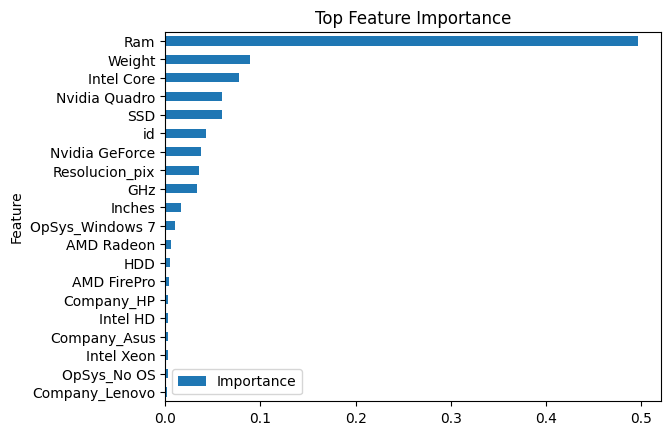

In [143]:
figsize=(14, 8)
importance_df.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Feature Importance")

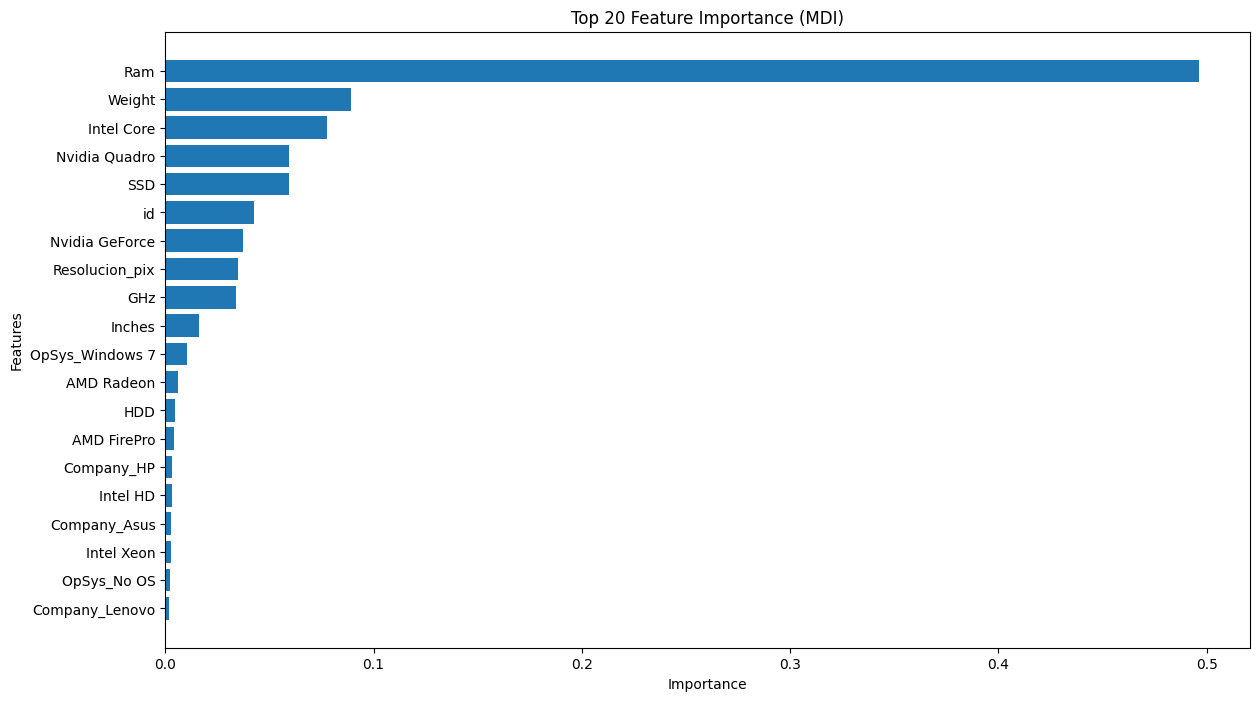

In [144]:
# Seleccionar las primeras 20 características más importantes
top_20_features = importance_df.head(20)

# Visualización de la importancia de las 20 características más importantes
fig, ax = plt.subplots(figsize=(14, 8))

ax.barh(np.arange(20), top_20_features['Importance'], align="center")
ax.set_yticks(np.arange(20))
ax.set_yticklabels(top_20_features.index)
ax.set_title("Top 20 Feature Importance (MDI)")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")

plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()

### Plot training deviance 

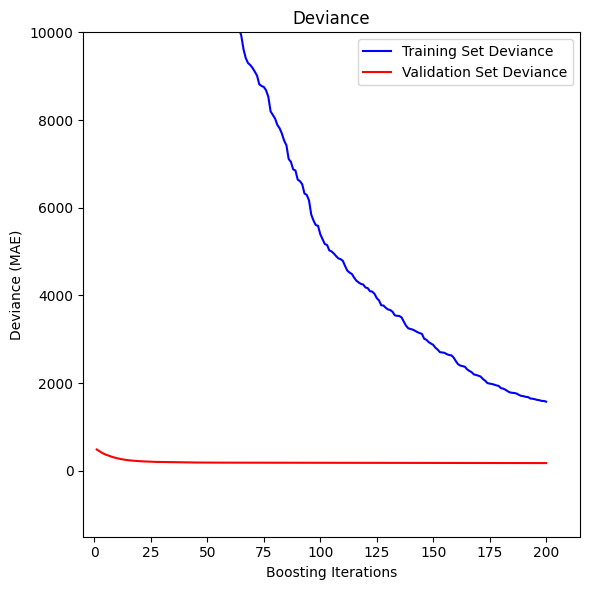

In [111]:
# Dividimos el conjunto de entrenamiento en entrenamiento y validación
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Definimos el modelo con los mejores hiperparámetros encontrados
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Ajustamos el modelo al conjunto de entrenamiento dividido
best_gb_model.fit(X_train_split, y_train_split)

# Inicializamos un array para almacenar el error cuadrático medio del conjunto de validación en cada etapa
val_score = np.zeros((best_gb_model.n_estimators,), dtype=np.float64)

# Calculamos el error cuadrático medio en cada etapa de predicción en el conjunto de validación
for i, y_pred in enumerate(best_gb_model.staged_predict(X_val)):
    val_score[i] = mean_absolute_error(y_val, y_pred)

# Generamos la gráfica de deviance
fig = plt.figure(figsize=(6, 6))
plt.title("Deviance")

# Curva de deviance para el conjunto de entrenamiento
plt.plot(
    np.arange(best_gb_model.n_estimators) + 1,
    best_gb_model.train_score_,
    "b-",
    label="Training Set Deviance",
)

# Curva de deviance para el conjunto de validación
plt.plot(
    np.arange(best_gb_model.n_estimators) + 1,
    val_score,
    "r-",
    label="Validation Set Deviance",
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance (MAE)")
plt.ylim(-1500, 10000)  # Establecer el límite del eje y hasta 20000
plt.xlim(-5, 215)  # Establecer el límite del eje x hasta 215
fig.tight_layout()
plt.show()

In [145]:
best_gb_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### https://cienciadedatos.net/documentos/py09_gradient_boosting_python
